# Módulo 4 – Aprendizaje Profundo
por: Juan José Molina Ocampo  
     Gloria Maritza Zapata González  
     Osiris Contreras Trillos  
     David Stiveen Tamayo Toro  


# Cargar librerías

In [72]:
%pip install gdown
### Carga de paquetes y librerias
import tensorflow as tf #Framework para deep learning
from tensorflow import keras #API que contiene la mayoría de funciones para las RN
from keras_tuner.tuners import RandomSearch
## importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as python_random

## Librerías para modelos de ML
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Librerias para redes neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

Note: you may need to restart the kernel to use updated packages.


# Caso de estudio:
Una empresa productora de arroz, desea evaluar la calidad de su arroz. A partir de una base de datos de imágenes de arroces de diferentes características, se han categorizado de la siguiente manera: 
* Mancha: Imágenes de granos de arroz con manchas visibles.
* Tiza: Granos de arroz con apariencia blanquecina similar a la tiza.
* Entero: Granos de arroz completos sin imperfecciones.
* Quebrado: Granos de arroz quebrados o fragmentados.  
El objetivo es construir un modelo de aprendizaje profundo que pueda clasificar los lotes de producción de arroces en sus respectivas categorías, para determinar la calidad de la producción, teniendo en cuenta que la empresa quiere destacarse en el mercado con variedad de productos de la mejor calidad


# Carga de datos

In [73]:
import os
import zipfile
import shutil
import gdown

# Directorio de destino para guardar los datasets
output_dir = './datasets/'

# Crea el directorio si no existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Función para descargar y extraer archivos comprimidos
def extract_zip(file_path, output_dir):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)

# Función para descargar archivos de Google Drive
def download_from_gdrive(file_id, dest_path):
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, dest_path, quiet=False)

# Descarga y extrae el primer archivo comprimido
download_from_gdrive('1WEUch4LcLRC2Upnfg-hnT4pPymov-SFn', os.path.join(output_dir, 'first_dataset.zip'))
extract_zip(os.path.join(output_dir, 'first_dataset.zip'), output_dir)

# Descarga y extrae el segundo archivo comprimido
download_from_gdrive('17c_1I3rrUovfYVDYxn7zkWtCR8Gz62sc', os.path.join(output_dir, 'second_dataset.zip'))
extract_zip(os.path.join(output_dir, 'second_dataset.zip'), output_dir)

# Descarga y extrae el tercer archivo comprimido
download_from_gdrive('1UmoHB1vGfiQ-F-HcGPCp96-hAahA2_89', os.path.join(output_dir, 'third_dataset.zip'))
extract_zip(os.path.join(output_dir, 'third_dataset.zip'), output_dir)

# Descarga y extrae el cuarto archivo comprimido
download_from_gdrive('1djsKtT1CVEZhWNeIR2MrLWE_3jqWDUfy', os.path.join(output_dir, 'fourth_dataset.zip'))
extract_zip(os.path.join(output_dir, 'fourth_dataset.zip'), output_dir)

# Directorio donde descomprimir los archivos combinados
combined_dir = './combined_dataset/'

# Crear el directorio de combinación si no existe
os.makedirs(combined_dir, exist_ok=True)

# Función para combinar los datasets en un solo directorio
def combine_datasets(input_dir, output_dir):
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            shutil.copy(os.path.join(root, file), output_dir)

# Combina los datasets en un solo directorio
combine_datasets(output_dir, combined_dir)

print(f"Los datasets han sido combinados en {combined_dir}.")


Downloading...
From: https://drive.google.com/uc?id=1WEUch4LcLRC2Upnfg-hnT4pPymov-SFn
To: c:\Users\osiri\Desktop\datasets\first_dataset.zip
100%|██████████| 16.3M/16.3M [00:00<00:00, 20.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=17c_1I3rrUovfYVDYxn7zkWtCR8Gz62sc
From (redirected): https://drive.google.com/uc?id=17c_1I3rrUovfYVDYxn7zkWtCR8Gz62sc&confirm=t&uuid=2a77e9e6-b8be-4927-941f-119f05c1176c
To: c:\Users\osiri\Desktop\datasets\second_dataset.zip
100%|██████████| 42.9M/42.9M [00:01<00:00, 26.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UmoHB1vGfiQ-F-HcGPCp96-hAahA2_89
To: c:\Users\osiri\Desktop\datasets\third_dataset.zip
100%|██████████| 23.5M/23.5M [00:00<00:00, 23.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1djsKtT1CVEZhWNeIR2MrLWE_3jqWDUfy
From (redirected): https://drive.google.com/uc?id=1djsKtT1CVEZhWNeIR2MrLWE_3jqWDUfy&confirm=t&uuid=d41e52e8-68eb-4f55-af1d-47ee9f59076d
To: c:\Users\osiri\Desktop\datasets\four

Los datasets han sido combinados en ./combined_dataset/.


### Visualización de las primeras 5 imágnenes

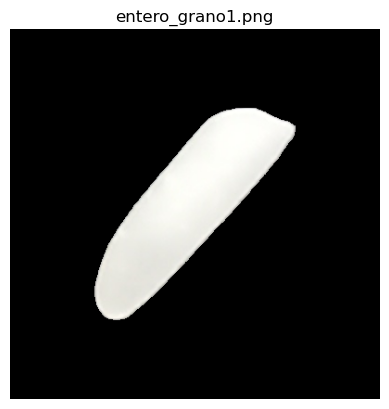

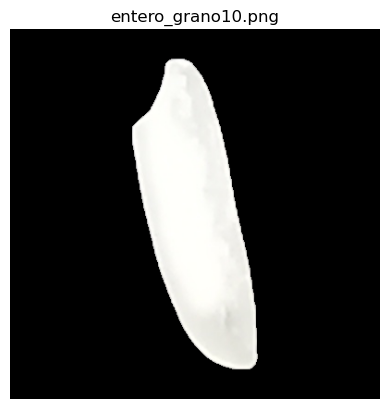

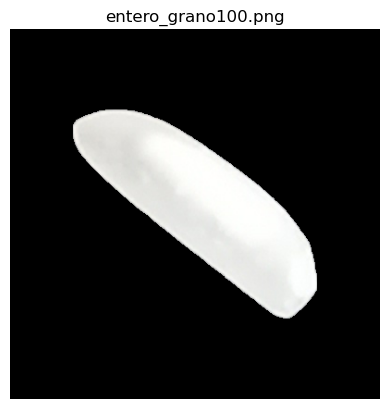

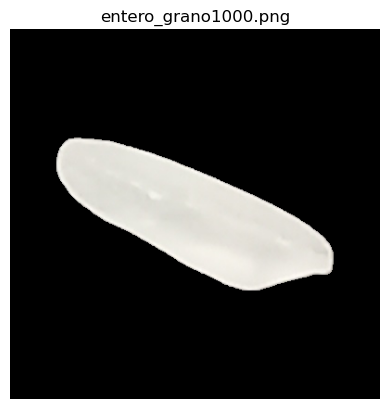

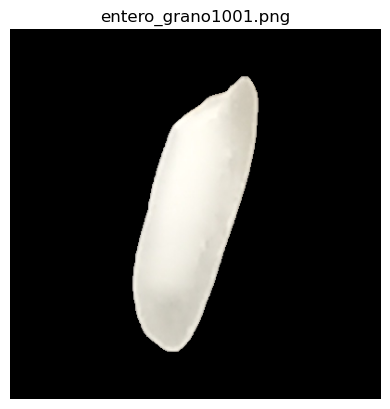

In [74]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directorio donde se han combinado los datasets
combined_dir = './combined_dataset/'

# Listar todos los archivos de imagen en el directorio
image_files = [f for f in os.listdir(combined_dir) if f.endswith('.png')]

# Mostrar las primeras 5 imágenes
for i, image_file in enumerate(image_files[:5]):  # Muestra las primeras 5 imágenes
    image_path = os.path.join(combined_dir, image_file)
    img = Image.open(image_path)
    plt.figure()
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')  # Ocultar los ejes
    plt.show()


In [75]:
# Directorio donde se han combinado los datasets
combined_dir = './combined_dataset/'

# Listar todos los archivos de imagen en el directorio
image_files = [f for f in os.listdir(combined_dir) if f.endswith('.png')]

num_observations = len(image_files)

print(f"El dataset tiene {num_observations} observaciones.")

El dataset tiene 6599 observaciones.


In [76]:
print(image_files)


['entero_grano1.png', 'entero_grano10.png', 'entero_grano100.png', 'entero_grano1000.png', 'entero_grano1001.png', 'entero_grano1002.png', 'entero_grano1003.png', 'entero_grano1004.png', 'entero_grano1005.png', 'entero_grano1006.png', 'entero_grano1007.png', 'entero_grano1008.png', 'entero_grano1009.png', 'entero_grano101.png', 'entero_grano1010.png', 'entero_grano1011.png', 'entero_grano1012.png', 'entero_grano1013.png', 'entero_grano1014.png', 'entero_grano1015.png', 'entero_grano1016.png', 'entero_grano1017.png', 'entero_grano1018.png', 'entero_grano1019.png', 'entero_grano102.png', 'entero_grano1020.png', 'entero_grano1021.png', 'entero_grano1022.png', 'entero_grano1023.png', 'entero_grano1024.png', 'entero_grano1025.png', 'entero_grano1026.png', 'entero_grano1027.png', 'entero_grano1028.png', 'entero_grano1029.png', 'entero_grano103.png', 'entero_grano1030.png', 'entero_grano1031.png', 'entero_grano1032.png', 'entero_grano1033.png', 'entero_grano1034.png', 'entero_grano1035.png', 

# Preparación de los datos


In [77]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os

# Establecer una semilla aleatoria para reproducibilidad
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Redimensionar las imágenes (por ejemplo, a 250x250 píxeles)
def resize_image(img_path, target_size):
    try:
        img = Image.open(img_path)
        img_resized = img.resize(target_size)
        return np.array(img_resized)
    except Exception as e:
        print(f"Error al procesar la imagen {img_path}: {e}")
        return None

# Directorio donde se encuentran las imágenes
image_dir = './combined_dataset/'

# Obtener la lista de archivos de imagen
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.png')]

# Verificar y eliminar imágenes vacías o corruptas
valid_image_files = []
for img_file in image_files:
    try:
        img = Image.open(img_file)
        # Verificar si la imagen está vacía comprobando su tamaño
        if img.size != (0, 0):
            valid_image_files.append(img_file)
        else:
            print(f"Imagen vacía eliminada: {img_file}")
    except Exception as e:
        print(f"Imagen corrupta eliminada: {img_file}, error: {e}")

# Imprimir la cantidad de imágenes válidas
print(f"Total de imágenes válidas: {len(valid_image_files)}")


Imagen corrupta eliminada: ./combined_dataset/entero_grano3352.png, error: cannot identify image file './combined_dataset/entero_grano3352.png'
Total de imágenes válidas: 6598


Se encuentran imágenes dañadas y son eliminadas
se procede a redimensionar las imagenes a un mismo tamaño, ya que había variaciones en estos, se elige un tamaño de 100 x100, para evitar errores de memoria. Y se normalizan los datos para eficiencia computacional.

In [85]:
# Redimensionar y normalizar las imágenes válidas
image_files_resized = [resize_image(img_file, target_size=(100, 100)) for img_file in valid_image_files]
image_files_resized = [img for img in image_files_resized if img is not None]  # Eliminar posibles imágenes que no se pudieron procesar
normalized_images = np.array(image_files_resized) / 255.0  # Normalizar píxeles al rango [0, 1]

# Obtener las etiquetas de las imágenes a partir del nombre del archivo
labels = ['Mancha', 'Tiza', 'Entero', 'Quebrado']
def get_label_from_filename(filename):
    for label in labels:
        if label.lower() in filename.lower():
            return label
    return None

encoded_labels = [labels.index(get_label_from_filename(os.path.basename(file_path))) for file_path in valid_image_files]
encoded_labels = [label for label in encoded_labels if label is not None]  # Eliminar posibles etiquetas None

# Convertir las etiquetas a formato one-hot
one_hot_labels = tf.keras.utils.to_categorical(encoded_labels)

### División de los datos en conjuntos de entrenamiento, validación y prueba

In [86]:
# División del conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(normalized_images, one_hot_labels, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

# Modelo 1 Base

Se parte de un modelo de red neuronal FCNN

In [206]:
# Definir la arquitectura del modelo FCNN
model = Sequential()
model.add(Flatten(input_shape=(100, 100, 3)))  # Aplanar las imágenes
model.add(Dense(128, activation='relu'))       # Capa oculta con 128 neuronas y activación ReLU
model.add(Dense(4, activation='softmax'))      # Capa de salida con 4 neuronas (una por cada categoría) y activación softmax

# Compilar el modelo
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 30000)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               3840128   
                                                                 
 dense_9 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3840644 (14.65 MB)
Trainable params: 3840644 (14.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [207]:
# Utilizar ImageDataGenerator para aumentar los datos
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20)
datagen.fit(X_train)

# Entrenar el modelo utilizando el generador de datos
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=10, 
                    validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")


Epoch 1/10
165/165 [==============================] - 13s 78ms/step - loss: 1.0528 - accuracy: 0.5866 - val_loss: 0.9388 - val_accuracy: 0.5379
Epoch 2/10
165/165 [==============================] - 13s 78ms/step - loss: 0.8312 - accuracy: 0.6332 - val_loss: 0.8786 - val_accuracy: 0.6212
Epoch 3/10
165/165 [==============================] - 13s 79ms/step - loss: 0.7517 - accuracy: 0.6705 - val_loss: 0.7101 - val_accuracy: 0.6758
Epoch 4/10
165/165 [==============================] - 13s 79ms/step - loss: 0.6739 - accuracy: 0.7023 - val_loss: 0.6825 - val_accuracy: 0.6848
Epoch 5/10
165/165 [==============================] - 13s 80ms/step - loss: 0.6711 - accuracy: 0.6995 - val_loss: 0.6474 - val_accuracy: 0.7000
Epoch 6/10
165/165 [==============================] - 13s 80ms/step - loss: 0.6331 - accuracy: 0.7088 - val_loss: 0.7152 - val_accuracy: 0.6924
Epoch 7/10
165/165 [==============================] - 14s 84ms/step - loss: 0.6207 - accuracy: 0.7143 - val_loss: 0.6251 - val_accuracy:

In [208]:
# Evaluación del modelo con el conjunto de prueba 
from sklearn.metrics import classification_report

class_names = ['Mancha', 'Tiza', 'Entero', 'Quebrado']

y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=class_names))

21/21 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

      Mancha       0.87      0.73      0.80        83
        Tiza       0.32      0.06      0.09       144
      Entero       0.69      0.93      0.79       354
    Quebrado       0.77      0.89      0.82        79

    accuracy                           0.71       660
   macro avg       0.66      0.65      0.63       660
weighted avg       0.64      0.71      0.65       660



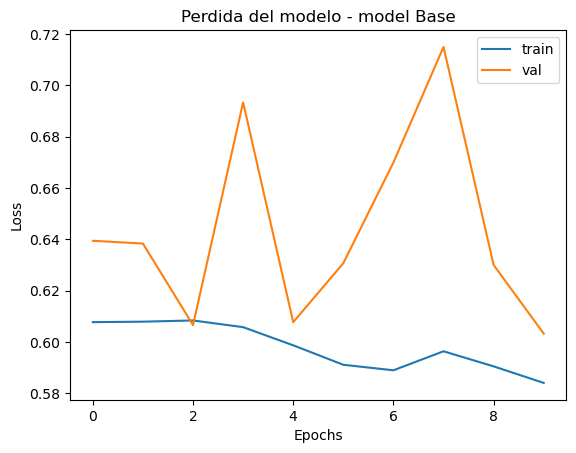

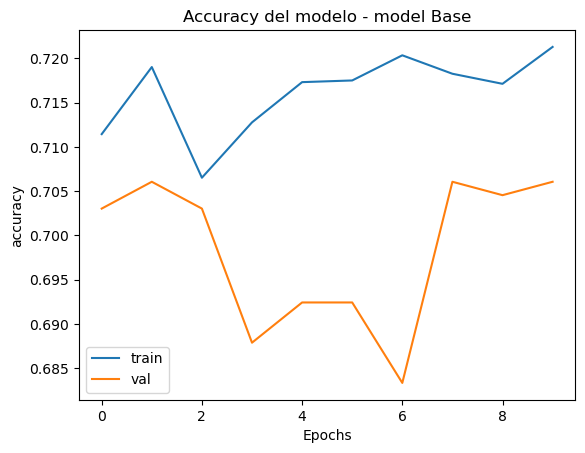

In [105]:
## Visualización de las curvas de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del modelo - model Base')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show() 

## Visualización de las curvas de accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del modelo - model Base')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show() 

El modelo de red neuronal convolucional (CNN) implementado alcanzó una precisión prometedora en el conjunto de prueba de la base de datos de imágenes de arroz. Esto sugiere que el modelo puede generalizar bien a datos no vistos y tiene un buen rendimiento en la clasificación de diferentes tipos de imágenes de arroz.

## Modelo 2

Se agregan neuronas a la primera capa densa, y se añade una capa densa más, para obtener mejores resultados.

In [100]:
# Definir la arquitectura del modelo FCNN
model2 = Sequential()
model2.add(Flatten(input_shape=(100, 100, 3)))  # Aplanar las imágenes
model2.add(Dense(256, activation='relu'))       
model2.add(Dense(128, activation='relu'))        
model2.add(Dense(4, activation='softmax'))      # Capa de salida con 4 neuronas (una por cada categoría) y activación softmax

# Compilar el modelo
model2.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 30000)             0         
                                                                 
 dense_42 (Dense)            (None, 256)               7680256   
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 dense_44 (Dense)            (None, 4)                 516       
                                                                 
Total params: 7713668 (29.43 MB)
Trainable params: 7713668 (29.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
# Utilizar ImageDataGenerator para aumentar los datos
datagen2 = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20)
datagen2.fit(X_train)

# Entrenar el modelo utilizando el generador de datos
history = model2.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=10, 
                    validation_data=(X_val, y_val))
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")


Epoch 1/10
165/165 [==============================] - 16s 96ms/step - loss: 1.0737 - accuracy: 0.5629 - val_loss: 0.9216 - val_accuracy: 0.4788
Epoch 2/10
165/165 [==============================] - 16s 98ms/step - loss: 0.8295 - accuracy: 0.6247 - val_loss: 0.7486 - val_accuracy: 0.6652
Epoch 3/10
165/165 [==============================] - 16s 100ms/step - loss: 0.7178 - accuracy: 0.6817 - val_loss: 0.7262 - val_accuracy: 0.6727
Epoch 4/10
165/165 [==============================] - 17s 101ms/step - loss: 0.7129 - accuracy: 0.6847 - val_loss: 0.7667 - val_accuracy: 0.6515
Epoch 5/10
165/165 [==============================] - 17s 101ms/step - loss: 0.6690 - accuracy: 0.6897 - val_loss: 0.6574 - val_accuracy: 0.7000
Epoch 6/10
165/165 [==============================] - 17s 105ms/step - loss: 0.6555 - accuracy: 0.6972 - val_loss: 0.7492 - val_accuracy: 0.6379
Epoch 7/10
165/165 [==============================] - 17s 102ms/step - loss: 0.6422 - accuracy: 0.6995 - val_loss: 0.6379 - val_accu

In [204]:
# Evaluación del modelo con el conjunto de prueba 
from sklearn.metrics import classification_report

class_names = ['Mancha', 'Tiza', 'Entero', 'Quebrado']

y_pred = np.argmax(model2.predict(X_test), axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=class_names))

21/21 [==============================] - 1s 27ms/step
              precision    recall  f1-score   support

      Mancha       0.86      0.86      0.86        83
        Tiza       0.60      0.02      0.04       144
      Entero       0.70      0.95      0.81       354
    Quebrado       0.80      0.90      0.85        79

    accuracy                           0.73       660
   macro avg       0.74      0.68      0.64       660
weighted avg       0.71      0.73      0.65       660



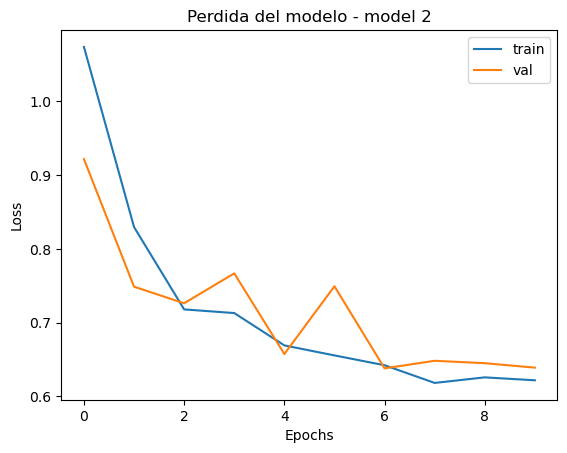

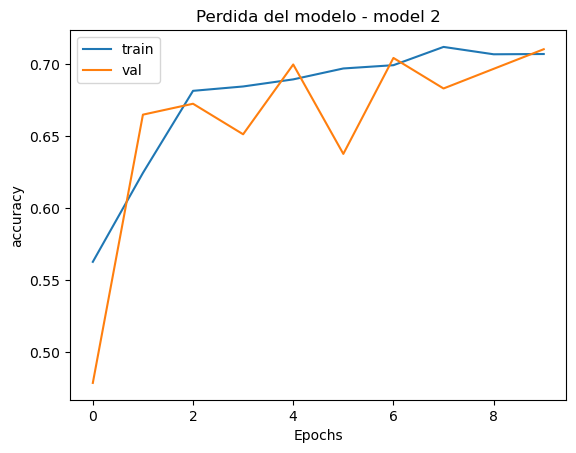

In [102]:
## Visualización de las curvas de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del modelo - model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show() 

## Visualización de las curvas de accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del modelo - model 2')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show() 

Basándonos en los resultados del modelo 2, podemos observar que ha mejorado la precisión en el conjunto de prueba en comparación con el modelo 1. El modelo 2 alcanzó una precisión del 73.03% en el conjunto de prueba, lo que indica una mejora respecto al modelo anterior.

Sin embargo, también es importante tener en cuenta que el modelo 2 parece tener una tendencia a sobreajustarse, ya que la precisión en el conjunto de validación disminuye ligeramente a medida que aumentan las épocas de entrenamiento. Esto podría indicar que se necesita una mayor regularización o ajuste en los hiperparámetros para mejorar la capacidad de generalización del modelo.

# Modelo 3

In [194]:
import kerastuner as kt

def model_builder(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(100, 100, 3)))
    
    # Tune the number of units in the first Dense layer
    hp_units1 = hp.Int('units1', min_value=64, max_value=256, step=32)
    model.add(Dense(units=hp_units1, activation='relu'))
    
    # Tune the dropout rate in the first layer
    hp_dropout1 = hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(rate=hp_dropout1))
    
    # Tune the number of units in the second Dense layer
    hp_units2 = hp.Int('units2', min_value=64, max_value=256, step=32)
    model.add(Dense(units=hp_units2, activation='relu'))
    
    # Tune the dropout rate in the second layer
    hp_dropout2 = hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(rate=hp_dropout2))
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.add(Dense(4, activation='softmax')) 
    
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='model3')

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
model3 = tuner.hypermodel.build(best_hps)


Trial 30 Complete [00h 01m 37s]
val_accuracy: 0.6969696879386902

Best val_accuracy So Far: 0.699999988079071
Total elapsed time: 00h 19m 55s


In [195]:
# Entrenar el modelo con los datos de entrenamiento y validar con los datos de validación
history = model3.fit(X_train, y_train,
                     epochs=10,
                     validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print("Precisión en el conjunto de prueba:", test_accuracy)


Epoch 1/10
165/165 [==============================] - 9s 54ms/step - loss: 1.0099 - accuracy: 0.5733 - val_loss: 0.9241 - val_accuracy: 0.6076
Epoch 2/10
165/165 [==============================] - 9s 55ms/step - loss: 0.9246 - accuracy: 0.5989 - val_loss: 0.8994 - val_accuracy: 0.5970
Epoch 3/10
165/165 [==============================] - 9s 55ms/step - loss: 0.8759 - accuracy: 0.6137 - val_loss: 0.8444 - val_accuracy: 0.6106
Epoch 4/10
165/165 [==============================] - 9s 55ms/step - loss: 0.8276 - accuracy: 0.6264 - val_loss: 0.8129 - val_accuracy: 0.6167
Epoch 5/10
165/165 [==============================] - 9s 56ms/step - loss: 0.7779 - accuracy: 0.6527 - val_loss: 0.7852 - val_accuracy: 0.6561
Epoch 6/10
165/165 [==============================] - 9s 57ms/step - loss: 0.7276 - accuracy: 0.6766 - val_loss: 0.7353 - val_accuracy: 0.6591
Epoch 7/10
165/165 [==============================] - 9s 57ms/step - loss: 0.6835 - accuracy: 0.7014 - val_loss: 0.6890 - val_accuracy: 0.6727

In [203]:
# Evaluación del modelo con el conjunto de prueba 
from sklearn.metrics import classification_report

class_names = ['Mancha', 'Tiza', 'Entero', 'Quebrado']

y_pred = np.argmax(model3.predict(X_test), axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=class_names))

21/21 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

      Mancha       0.89      0.75      0.81        83
        Tiza       0.75      0.02      0.04       144
      Entero       0.69      0.95      0.80       354
    Quebrado       0.73      0.89      0.80        79

    accuracy                           0.72       660
   macro avg       0.76      0.65      0.61       660
weighted avg       0.73      0.72      0.63       660



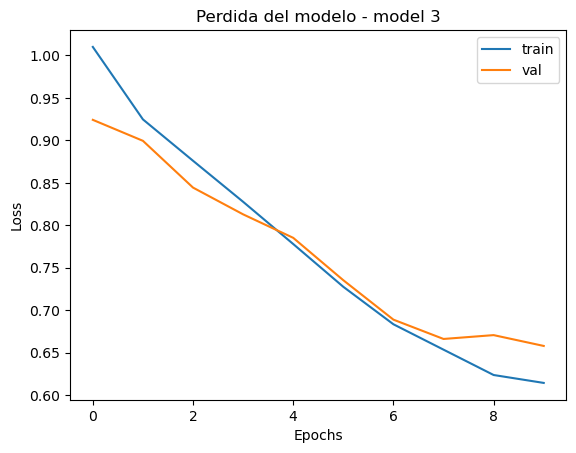

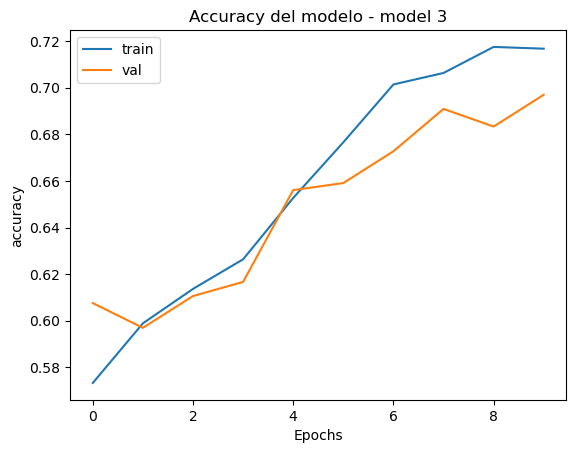

In [196]:
## Visualización de las curvas de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del modelo - model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show() 

## Visualización de las curvas de accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del modelo - model 3')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show() 

El modelo 3 representa una mejora significativa con respecto al modelo base (modelo 1) y muestra un desempeño competitivo en comparación con el modelo 2. Esto sugiere que una arquitectura de red neuronal con dos capas ocultas puede ser suficiente para lograr un buen rendimiento en la clasificación de imágenes de arroz.

# Modelo 4 - convolucional


Red neuronal convolucional

In [197]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir el modelo CNN
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compilar el modelo
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model4.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)      

In [198]:
# Entrenar el modelo
history = model4.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model4.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")


Epoch 1/10
165/165 [==============================] - 55s 328ms/step - loss: 0.8141 - accuracy: 0.6423 - val_loss: 0.6516 - val_accuracy: 0.7167
Epoch 2/10
165/165 [==============================] - 53s 321ms/step - loss: 0.6157 - accuracy: 0.7160 - val_loss: 0.6043 - val_accuracy: 0.6985
Epoch 3/10
165/165 [==============================] - 51s 307ms/step - loss: 0.5912 - accuracy: 0.7270 - val_loss: 0.5950 - val_accuracy: 0.7076
Epoch 4/10
165/165 [==============================] - 51s 311ms/step - loss: 0.5669 - accuracy: 0.7389 - val_loss: 0.5380 - val_accuracy: 0.7455
Epoch 5/10
165/165 [==============================] - 52s 318ms/step - loss: 0.5076 - accuracy: 0.7668 - val_loss: 0.5337 - val_accuracy: 0.7439
Epoch 6/10
165/165 [==============================] - 52s 313ms/step - loss: 0.4830 - accuracy: 0.7819 - val_loss: 0.5185 - val_accuracy: 0.7621
Epoch 7/10
165/165 [==============================] - 52s 314ms/step - loss: 0.4412 - accuracy: 0.8030 - val_loss: 0.4814 - val_ac

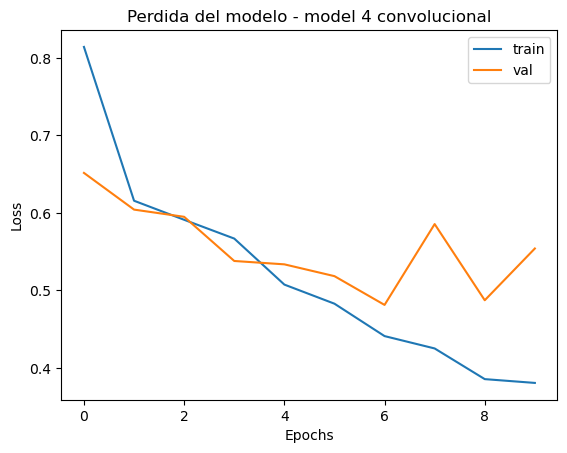

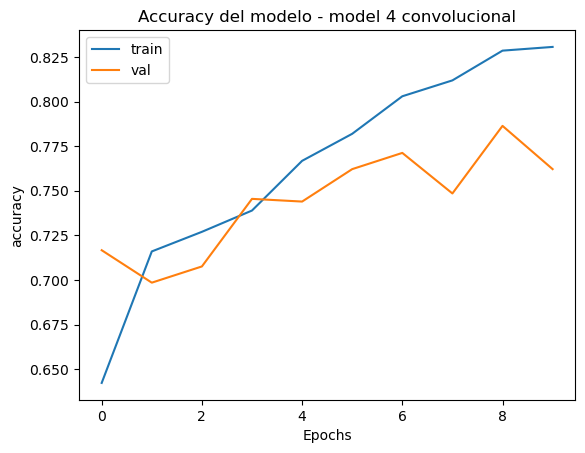

In [199]:
## Visualización de las curvas de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del modelo - model 4 convolucional')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show() 

## Visualización de las curvas de accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del modelo - model 4 convolucional')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show() 

In [201]:
# Evaluación del modelo con el conjunto de prueba 
from sklearn.metrics import classification_report

class_names = ['Mancha', 'Tiza', 'Entero', 'Quebrado']

y_pred = np.argmax(model4.predict(X_test), axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=class_names))

21/21 [==============================] - 1s 58ms/step
              precision    recall  f1-score   support

      Mancha       0.98      0.73      0.84        83
        Tiza       0.63      0.59      0.61       144
      Entero       0.81      0.86      0.83       354
    Quebrado       0.80      0.89      0.84        79

    accuracy                           0.79       660
   macro avg       0.80      0.77      0.78       660
weighted avg       0.79      0.79      0.78       660



En comparación con los modelos anteriores, el modelo 4 muestra una mejora significativa en la precisión en el conjunto de prueba. Esto indica que la arquitectura más profunda y compleja de la red convolucional puede capturar características más abstractas y complejas de las imágenes de arroz, lo que conduce a una mejor capacidad de clasificación.
* En cuanto a la precisión: Se observa que la precisión varía entre las clases, siendo más alta para la clase "Mancha" (98%) y más baja para la clase "Tiza" (63%). Esto sugiere que el modelo tiende a hacer predicciones más precisas para la clase "Mancha" en comparación con otras clases.
* Se observa que el recall varía entre las clases, siendo más alto para la clase "Quebrado" (89%) y más bajo para la clase "Mancha" (73%). Esto indica que el modelo tiene una mejor capacidad para identificar correctamente los casos de "Quebrado" en comparación con otras clases.
* Se observa que el F1-score varía entre las clases, pero en general es alto para todas las clases, lo que sugiere un buen equilibrio entre precisión y recall.
* La exactitud global del modelo en el conjunto de prueba es del 79%, lo que indica que el modelo es capaz de clasificar correctamente aproximadamente el 79% de las imágenes de arroz en el conjunto de prueba.

El mejor modelo es el modelo 4